<a href="https://colab.research.google.com/github/QueenieeQ/image_process/blob/master/Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***Question 1: What are x and y kernels in Sobel filter?***

**Answer**: The Sobel operator uses **two convolution kernels**, one to calculate the **gradient in the x-direction** (horizontal) and another to calculate the **gradient in the y-direction** (vertical). These gradients help identify changes in intensity in the respective directions, which typically correspond to edges in the image.

### **1. Sobel X Kernel (`sobel_x`)**

This highlights **vertical** edges by enhancing changes in pixel values in the **horizontal** direction.

Sobel x kernel:
 $\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$

**Usage**:

- When convolve this kernel with an image, the result will show **strong responses for vertical edges**, since vertical edges correspond to areas where the intensity values change sharply from left to right or right to left.

### **2. Sobel Y Kernel (`sobel_y`)**

Sobel y kernel highlights **horizontal** edges by enhancing changes in pixel values in the **vertical** direction.

Sobel y kernel is:
$\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}$

**Usage**:

- When convolve this kernel with an image, the result will show **strong responses for horizontal edges**, highlighting regions where intensity values change sharply from top to bottom or vice versa.

### **Combining the X and Y Gradients**

When you apply both kernels to an image, you obtain two separate gradient images:

1. **Gradient in the X-direction**: Highlights vertical edges.
2. **Gradient in the Y-direction**: Highlights horizontal edges.

To get the overall edge strength or **gradient magnitude**, you combine these two gradients using the following formula:

${magnitude} = \sqrt{(\text{sobel\_x})^2 + (\text{sobel\_y})^2}$

This produces an image where each pixel represents the strength of the edge at that point, combining both horizontal and vertical information.

0. Input image


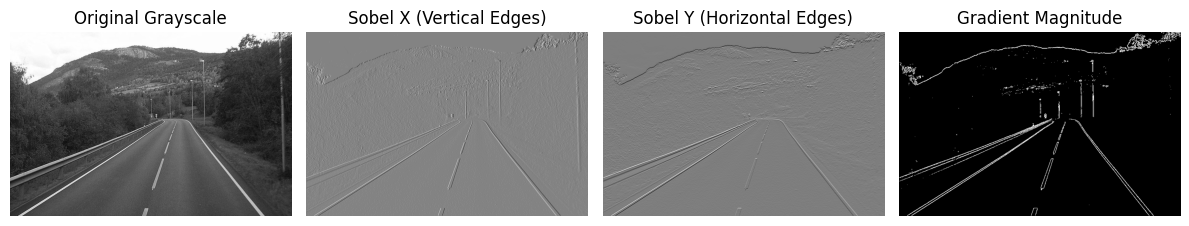

In [12]:
import cv2
import numpy as numpy
from matplotlib import pyplot as plt

# step 1
pic = cv2.imread('/content/Road_image.jpg')
print('0. Input image')
# get image dimensions and color channel
height, width, channels = pic.shape
# declare an empty array variable for grayscale image
grayscale_image = numpy.zeros((height,width), dtype = numpy.uint8)

# interate over every pixel from top to bottom, left to right and apply luminance formula
for row in range(height):
    for collum in range(width):
        # take r,g,b value
        r,g,b = pic[row,collum]
        # calculate grayscale luminance
        grayscale_value = int(0.299 * r + 0.587 * g + 0.114 * b)
        # save the grayscale value to new image
        grayscale_image[row, collum] = grayscale_value
# get grayscaled image size
height, width = grayscale_image.shape
#sobel_kernel horizontal an vertical formula
sobel_x_kernel = numpy.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = numpy.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# empty array to sore data
sobel_x = numpy.zeros_like(grayscale_image, dtype=numpy.float32)
sobel_y = numpy.zeros_like(grayscale_image, dtype=numpy.float32)
# convolution image
# start from 1 because inoring image borders
for row in range(1, height -1):
    for column in range(1, width - 1):
        # get sourounding 3x3 region from pixel
        region = grayscale_image[row - 1: row +2, column -1: column+2]
        #calculate horizontal and vertical kernel
        result_x = numpy.sum(region*sobel_x_kernel)
        result_y = numpy.sum(region*sobel_y_kernel)
        # save result
        sobel_x[row, column] = result_x
        sobel_y[row, column] = result_y
# calculate gradient magnitude
sobel_magnitude = numpy.sqrt((sobel_x**2)+(sobel_y**2))
#normalized the magnitude number (0-255)
sobel_magnitude_normalized = numpy.uint8(255 * sobel_magnitude / numpy.max(sobel_magnitude))
# apply a threshold value to create binary edge iamge
_,binary_output = cv2.threshold(sobel_magnitude_normalized, 80, 255, cv2.THRESH_BINARY)
# cv2.imshow('2. sobel_filter',binary_output)
# Step 5: Display the original and resulting images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title('Original Grayscale')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Sobel X (Vertical Edges)')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Sobel Y (Horizontal Edges)')
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Gradient Magnitude')
plt.imshow(binary_output, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



***Question 2: what is this angle***

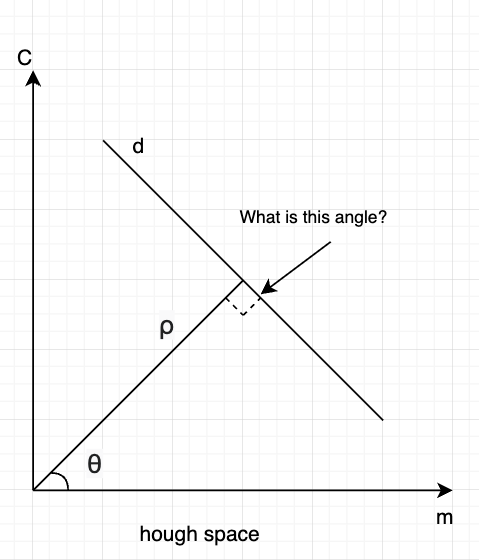

**Answer**:
In the Hough Transform, every line in the image can be represented as a unique pair of
(
𝜌
,
𝜃
)
.This allows us to transform lines from the image space (Cartesian space) to the parameter space (Hough space).

ρ is the distance of the line from the origin (measured perpendicularly).

𝜃 is the angle that the perpendicular from the origin makes with the positive x-axis.

 The angle between
ρ (the perpendicular distance from the origin) and the line (d) is always  $90^\circ $  since
ρ is by definition perpendicular to line (d).

***Question 3: Do `-1` have special meaning in python?***

In Python, `-1` has some **special meanings** depending on the context in which it is used:

1. **Indexing in Lists or Arrays**

In Python, negative indices are used to access elements from the end of a list, tuple, or array:

- **`-1`** refers to the **last element** of the list.
- **Example**:In this case, `-1` accesses the last element of `my_list`.

In [ ]:
my_list = [10, 20, 30, 40]
print(my_list[-1])  # Output: 40

40


2. **Looping in Reverse**
You can use -1 as the step argument in slicing to reverse a list or loop backward:

**Example**:Here, [::-1] is used to reverse the list.

In [ ]:
my_list = [1, 2, 3, 4]
reversed_list = my_list[::-1]
print(reversed_list)  # Output: [4, 3, 2, 1]

[4, 3, 2, 1]


3. **Return Values Indicating Failure or Not Found**
In certain functions or methods, `-1` is used as a **sentinel value** to indicate that something was **not found** or an **error occurred**:

- **Example**:The `str.find()` method returns `1` if the substring is not found.

In [ ]:
my_str = "ninh xuan quy"
index = my_str.find("z")
print(index)  # Output: -1

-1


4. **OpenCV (cv2) Usage**

In OpenCV, `-1` can have specific meanings for functions:

- **Kernel Size or Thickness**: When drawing with OpenCV (`cv2`), `1` is often used to indicate a **filled shape**.

In [ ]:
import cv2

cv2.circle(image, (x, y), radius, color, -1)  # Draw a filled circle

5. **Looping Backwards**

In loops, `-1` can be used to **iterate backward** through a sequence, often in combination with the `range()` function:

- **Example**:This code loops from `5` to `0` in reverse order.

In [ ]:
for i in range(5, -1, -1):
    print(i)

5
4
3
2
1
0



***Question 4. what does this code mean?***
```
line1 = numpy.array([[numpy.cos(theta1),numpy.sin(theta1)],
                                [numpy.cos(theta2), numpy.sin(theta2)]])
line2 = numpy.array([rho1, rho2])
```

### **Linear System**

The **Hough transform** represents a line in **polar form**:

$ρ=xcos⁡(θ)+ysin⁡(θ)\rho = x \cos(\theta) + y \sin(\theta)$

- **$ρ$**  is the perpendicular distance from the origin to the line, and  $\theta$ is the angle of this perpendicular line to the x-axis.
- To find the intersection of two lines represented in polar coordinates, i derive their cartesian form and use a system of equations.

For two lines:

1. Line 1: $\rho_1 = x \cos(\theta_1) + y \sin(\theta_1)$
2. Line 2:$\rho_2 = x \cos(\theta_2) + y \sin(\theta_2)$

These two equations can be represented in matrix form as:

$\begin{bmatrix}
\cos(\theta_1) & \sin(\theta_1) \\
\cos(\theta_2) & \sin(\theta_2)
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
\rho_1 \\
\rho_2
\end{bmatrix}$

The goal is to solve for $x$ and $y$, which represents the coordinates of the intersection point.

---

Now explain the code

```python
line1 = numpy.array([[numpy.cos(theta1),numpy.sin(theta1)],
                                [numpy.cos(theta2), numpy.sin(theta2)]])
line2 = numpy.array([rho1, rho2])
```

### **Constructing the coefficient matrix (`line1`)**

```python
line1 = numpy.array([[numpy.cos(theta1), numpy.sin(theta1)],
                     [numpy.cos(theta2), numpy.sin(theta2)]])
```

This matrix represents the coefficients of the system of linear equations for the two lines.

Consider two lines represented in polar form:

- **Line 1**:  $\rho_1 =x \cdot \cos(\theta_1) + y \cdot \sin(\theta_1)$
- **Line 2**: $\rho_2 = x\cdot \cos(\theta_2) + y \cdot \sin(\theta_2)$

I can represent these two lines in matrix form:

$\begin{bmatrix}
\cos(\theta_1) & \sin(\theta_1) \\
\cos(\theta_2) & \sin(\theta_2)
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
\rho_1 \\
\rho_2
\end{bmatrix}$

**`line1`** represents the coefficient matrix:

$\begin{bmatrix}
\cos(\theta_1) & \sin(\theta_1) \\
\cos(\theta_2) & \sin(\theta_2)
\end{bmatrix}$

This matrix is used to represent the coefficients of **x** and **y** in the linear equations of the two line

### **Constructing the constant vector (`line2`)**

```python
line2 = numpy.array([rho1, rho2])
```

This is the right-hand side vector of the linear system, which contains **$\rho$** values for both lines.

The vector can be represented as:

$B = \begin{bmatrix}
\rho_1 \\
\rho_2
\end{bmatrix}$

### **Solving the Linear System for Intersection Point**

```python
    # Solve for intersection point
    intersecPoint = numpy.linalg.solve(line1, line2)
```

Here, I am trying to solve the system of equations in matrix form:

 $A \cdot X = B$

Where:

- **`A`** (`line1`) is the coefficient ****matrix.
- **`X`** represents the unknowns [$x,y$], which are the coordinates of the intersection point.
- **`B`** (`line2`) is the constant ****vector containing the ρ values.

To solve for **`X`** (the intersection point), i use:

$X = A^{-1} \cdot B$

In my code, this is done using numpy library `numpy.linalg.solve()`, which efficiently finds the solution **`X`** for a system of linear equations.

**`intersecPoint = numpy.linalg.solve(line1, line2)`** calculates the coordinates of the intersection point as $(x,y)$.